# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import logging
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#  URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
citydata = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        citydata.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | mehamn
Processing Record 3 of Set 1 | esperance
Processing Record 4 of Set 1 | chuy
Processing Record 5 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 6 of Set 1 | dunedin
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | rumoi
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | eirunepe
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | victoria
Processing Record 13 of Set 1 | camargo
Processing Record 14 of Set 1 | soyo
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | bengkulu
Processing Record 18 of Set 1 | bitung
Processing Record 19 of Set 1 | lukovskaya
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | hermanus
Processing

Processing Record 35 of Set 4 | vilhena
Processing Record 36 of Set 4 | makakilo city
Processing Record 37 of Set 4 | kisii
Processing Record 38 of Set 4 | san francisco
Processing Record 39 of Set 4 | zalantun
Processing Record 40 of Set 4 | nikolskoye
Processing Record 41 of Set 4 | kahului
Processing Record 42 of Set 4 | pangnirtung
Processing Record 43 of Set 4 | chaumont
Processing Record 44 of Set 4 | saint-philippe
Processing Record 45 of Set 4 | maine-soroa
Processing Record 46 of Set 4 | manakara
Processing Record 47 of Set 4 | chokurdakh
Processing Record 48 of Set 4 | hamilton
Processing Record 49 of Set 4 | tazovskiy
Processing Record 0 of Set 5 | east london
Processing Record 1 of Set 5 | antsohihy
Processing Record 2 of Set 5 | verona
Processing Record 3 of Set 5 | dolbeau
City not found. Skipping...
Processing Record 4 of Set 5 | saint george
Processing Record 5 of Set 5 | gornopravdinsk
Processing Record 6 of Set 5 | paamiut
Processing Record 7 of Set 5 | cidreira
Proce

Processing Record 22 of Set 8 | bambous virieux
Processing Record 23 of Set 8 | sur
Processing Record 24 of Set 8 | tura
Processing Record 25 of Set 8 | quetzaltepec
City not found. Skipping...
Processing Record 26 of Set 8 | sao miguel do araguaia
Processing Record 27 of Set 8 | corbelia
Processing Record 28 of Set 8 | mahibadhoo
Processing Record 29 of Set 8 | fukue
Processing Record 30 of Set 8 | requena
Processing Record 31 of Set 8 | shahr-e babak
Processing Record 32 of Set 8 | mortka
Processing Record 33 of Set 8 | hokitika
Processing Record 34 of Set 8 | tuatapere
Processing Record 35 of Set 8 | mogochin
City not found. Skipping...
Processing Record 36 of Set 8 | bumba
Processing Record 37 of Set 8 | berlevag
Processing Record 38 of Set 8 | okha
Processing Record 39 of Set 8 | mar del plata
Processing Record 40 of Set 8 | turukhansk
Processing Record 41 of Set 8 | airai
Processing Record 42 of Set 8 | aswan
Processing Record 43 of Set 8 | garissa
Processing Record 44 of Set 8 |

Processing Record 10 of Set 12 | gillingham
Processing Record 11 of Set 12 | lata
Processing Record 12 of Set 12 | narsaq
Processing Record 13 of Set 12 | arbuzynka
Processing Record 14 of Set 12 | mogadishu
Processing Record 15 of Set 12 | ahuimanu
Processing Record 16 of Set 12 | tongliao
Processing Record 17 of Set 12 | arrecife
Processing Record 18 of Set 12 | surt
Processing Record 19 of Set 12 | chama
Processing Record 20 of Set 12 | vila do maio
Processing Record 21 of Set 12 | qasigiannguit
Processing Record 22 of Set 12 | dingle
Processing Record 23 of Set 12 | rosetta
Processing Record 24 of Set 12 | amga
Processing Record 25 of Set 12 | kangaba
Processing Record 26 of Set 12 | pochutla
Processing Record 27 of Set 12 | dao
Processing Record 28 of Set 12 | porto belo
Processing Record 29 of Set 12 | acapulco
Processing Record 30 of Set 12 | gravdal
Processing Record 31 of Set 12 | valleyview
Processing Record 32 of Set 12 | dovers
Processing Record 33 of Set 12 | erenhot
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(citydata)


In [6]:
# Show Record Count
city_data_pd.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,20.151577,13.910380,64.499192,73.269300,58.965889,8.177145,1.633211e+09
std,32.544958,90.303285,18.278360,19.718322,38.608307,5.995716,6.174421e+01
min,-54.800000,-179.166700,8.240000,9.000000,0.000000,0.000000,1.633210e+09
25%,-5.258100,-65.712500,52.070000,64.000000,20.000000,3.620000,1.633211e+09
50%,22.566700,18.423200,69.890000,77.000000,75.000000,6.910000,1.633211e+09
75%,45.966700,88.666700,78.660000,88.000000,98.000000,11.500000,1.633211e+09
max,78.218600,179.316700,96.120000,100.000000,100.000000,30.090000,1.633211e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
humidity_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
                                  
humidity_data

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(humidity_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaanaaq,77.4840,-69.3632,29.25,92,100,15.10,GL,1633210761
1,mehamn,71.0357,27.8492,50.72,85,98,19.35,NO,1633210761
2,esperance,-33.8667,121.9000,53.44,67,64,27.09,AU,1633210761
3,chuy,-33.6971,-53.4616,55.54,82,25,7.78,UY,1633210761
4,dunedin,-45.8742,170.5036,54.81,75,94,7.00,NZ,1633210639


In [10]:
# Extract relevant fields from the data frame
Latitude = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


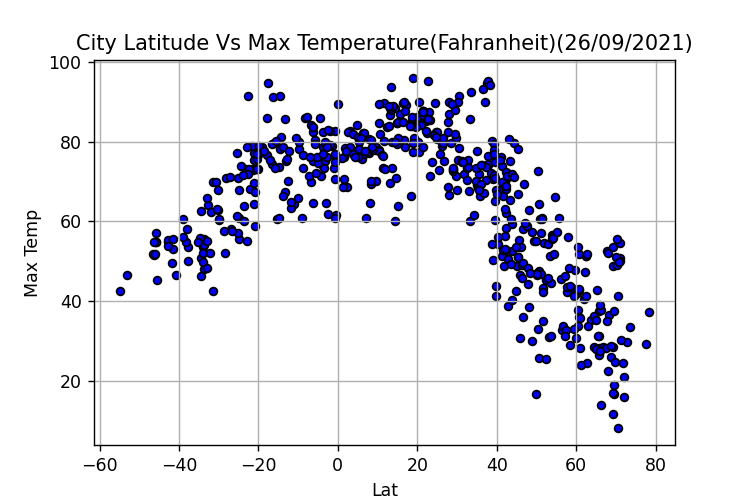

In [11]:
city_data_pd.plot(kind = 'scatter',x ='Lat', y ='Max Temp',figsize=(6,4),color ="Blue",edgecolor="black", grid = True)
plt.title("City Latitude Vs Max Temperature(Fahranheit)(26/09/2021)")
# Show plot
plt.show()
# Save the figure
plt.savefig("output_data/Fig1.png")

## Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


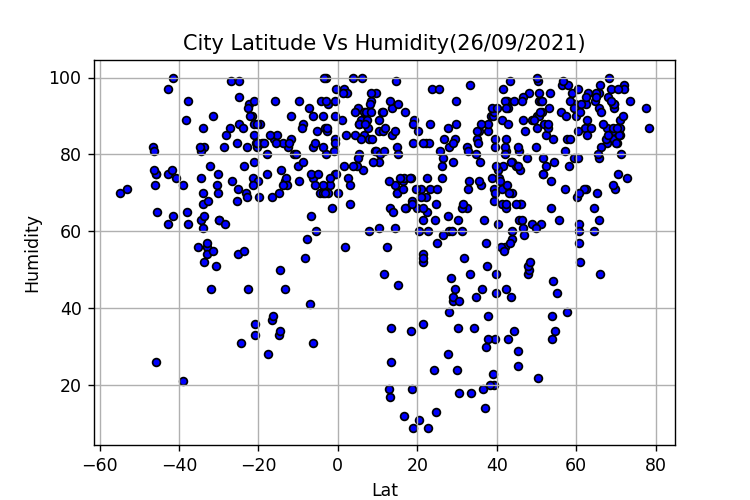

In [12]:
# Scatter plot for latitude vs. Humidity
city_data_pd.plot(kind = 'scatter',x = 'Lat', y ='Humidity',figsize=(6,4),color ="Blue",edgecolor="black",grid = True)
plt.title("City Latitude Vs Humidity(26/09/2021)")
# Show plot
plt.show()
# Save the figure
plt.savefig("output_data/Fig2.png")

## Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


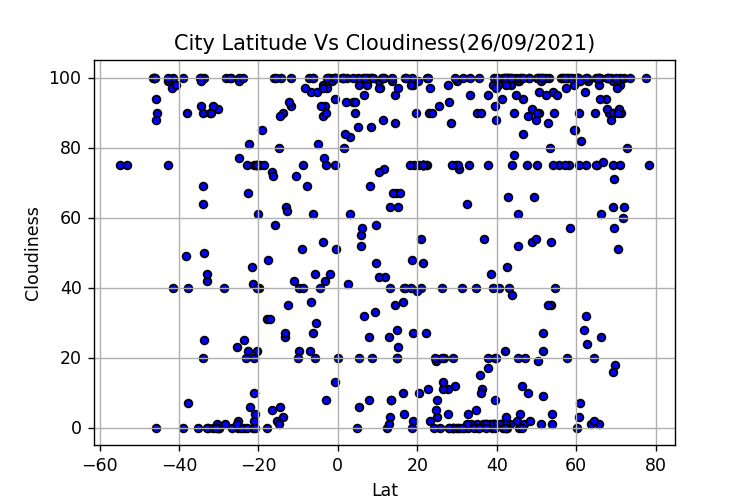

In [13]:
# Scatter plot for latitude vs.Cloudiness
city_data_pd.plot(kind = 'scatter',x = 'Lat', y ='Cloudiness',figsize=(6,4),color ="Blue",edgecolor="black", grid = True)
plt.title("City Latitude Vs Cloudiness(26/09/2021)")
# Show plot
plt.show()
# Save the figure
plt.savefig("output_data/Fig3.png")

## Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


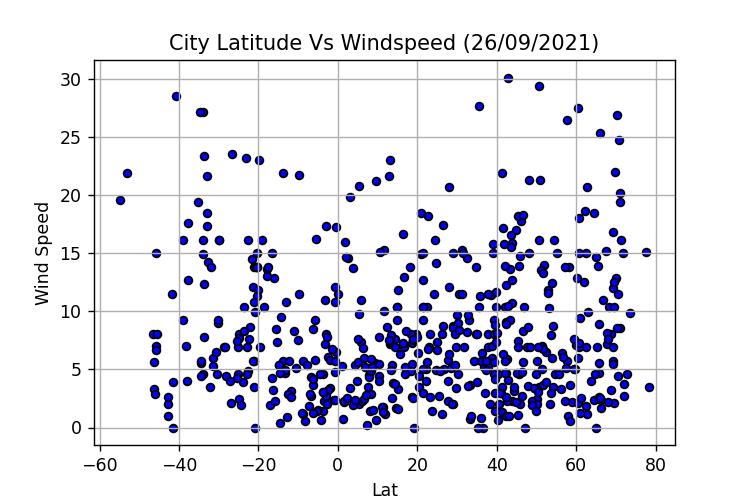

In [14]:
# Scatter plot for latitude vs.Wind Speed
city_data_pd.plot(kind = 'scatter',x = 'Lat', y ='Wind Speed',figsize=(6,4),color ="Blue",edgecolor="black", grid = True)
plt.title("City Latitude Vs Windspeed (26/09/2021)")
# Show plot
plt.show()
# Save the figure
plt.savefig("output_data/Fig4.png")

## Linear Regression

In [15]:
#Northern Hemisphere data frame
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaanaaq,77.4840,-69.3632,29.25,92,100,15.10,GL,1633210761
1,mehamn,71.0357,27.8492,50.72,85,98,19.35,NO,1633210761
5,khatanga,71.9667,102.5000,15.78,98,63,2.68,RU,1633210761
6,rumoi,43.9344,141.6428,59.31,58,38,15.86,JP,1633210761
8,victoria,22.2855,114.1577,85.32,83,27,4.00,HK,1633210696


In [16]:
#Southern Hemisphere data frame
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,esperance,-33.8667,121.9000,53.44,67,64,27.09,AU,1633210761
3,chuy,-33.6971,-53.4616,55.54,82,25,7.78,UY,1633210761
4,dunedin,-45.8742,170.5036,54.81,75,94,7.00,NZ,1633210639
7,eirunepe,-6.6603,-69.8736,84.31,64,96,2.75,BR,1633210761
10,soyo,-6.1349,12.3689,75.20,82,61,8.46,AO,1633210762


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The value of r is -0.82


<IPython.core.display.Javascript object>


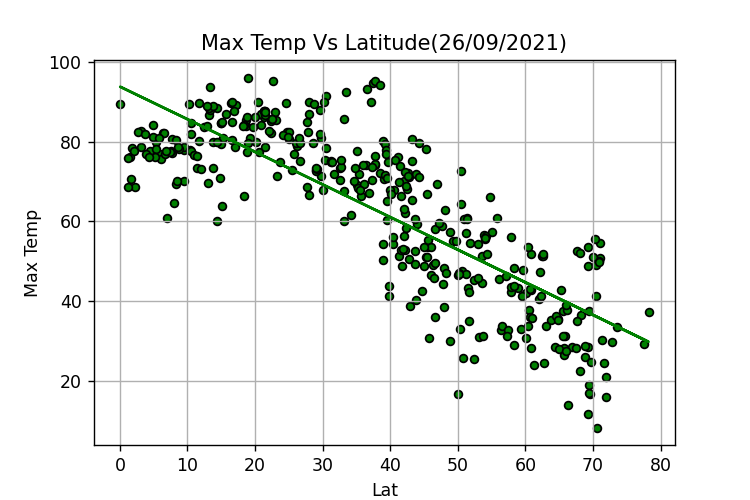

Text(0.5, 1.0, 'Max Temp Vs Latitude(26/09/2021)')

In [17]:
#define x-axis 
x_axis =northern_hemi_df['Lat']
#correlation coeffecient
corr, _ = stats.pearsonr(x_axis,northern_hemi_df['Max Temp'])
print(f"The value of r is {round(corr, 2)}")

#scatter plot 
northern_hemi_df.plot(kind = 'scatter',x = 'Lat', y ='Max Temp',figsize=(6,4),color ="Green",edgecolor="black",grid = True)
plt.title("Max Temp Vs Latitude(26/09/2021)")

In [18]:
#linear regression  Max Temp(Farenheit)Vs Latitude - Northern Hemisphere
humid_slope,humid_int,humid_r,humid_p,humid_std_err = stats.linregress (x_axis,northern_hemi_df['Max Temp'])
humid_fit = humid_slope*x_axis + humid_int
#plot the linear regression
plt.plot(x_axis,humid_fit,color='Green')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The value of r is 0.73


<IPython.core.display.Javascript object>


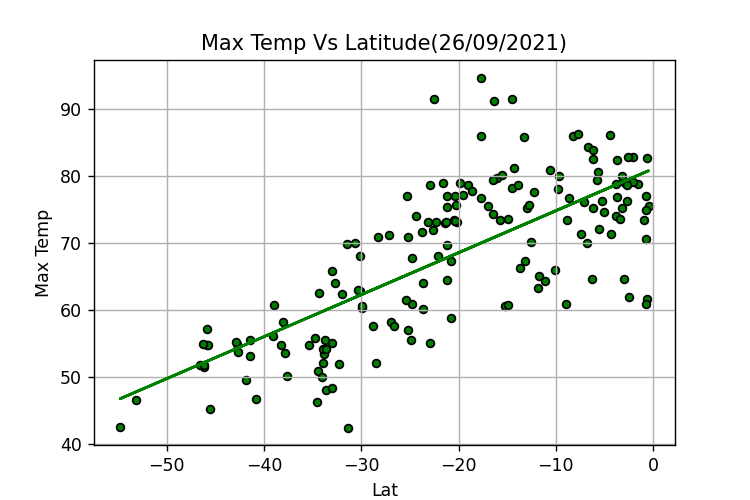

Text(0.5, 1.0, 'Max Temp Vs Latitude(26/09/2021)')

In [19]:
#define x-axis for further calculations
x_axis =southern_hemi_df['Lat']
#correlation coeffecient
corr, _ = stats.pearsonr(x_axis,southern_hemi_df['Max Temp'])
print(f"The value of r is {round(corr, 2)}")

#scatter plot 
southern_hemi_df.plot(kind = 'scatter',x = 'Lat', y ='Max Temp',figsize=(6,4),color ="Green",edgecolor="black",grid = True)
plt.title("Max Temp Vs Latitude(26/09/2021)")

In [23]:
#linear regression  Max Temp(Farenheit)Vs Latitude- Southern Hemisphere
humid_slope,humid_int,humid_r,humid_p,humid_std_err = stats.linregress (x_axis,southern_hemi_df['Max Temp'])
humid_fit = humid_slope*x_axis + humid_int
#plot the linear regression
plt.plot(x_axis,humid_fit,color='Green')


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The value of r is 0.15


<IPython.core.display.Javascript object>


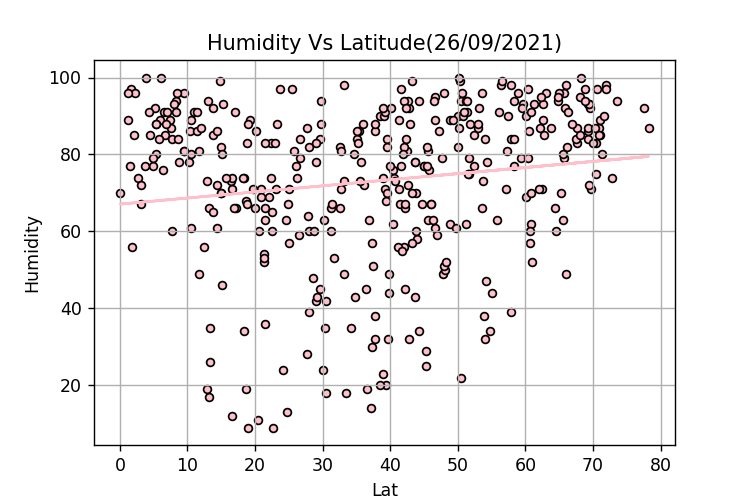

Text(0.5, 1.0, 'Humidity Vs Latitude(26/09/2021)')

In [24]:
#define x-axis for further calculations
x_axis =northern_hemi_df['Lat']
#correlation coeffecient
corr, _ = stats.pearsonr(x_axis,northern_hemi_df['Humidity'])
print(f"The value of r is {round(corr, 2)}")

#scatter plot 
northern_hemi_df.plot(kind = 'scatter',x = 'Lat', y ='Humidity',figsize=(6,4),color ="Pink",edgecolor="black",grid = True)
plt.title("Humidity Vs Latitude(26/09/2021)")

In [25]:
#linear regression Humidity vs Latitude - Northern Hemisphere
humid_slope,humid_int,humid_r,humid_p,humid_std_err = stats.linregress (x_axis,northern_hemi_df['Humidity'])
humid_fit = humid_slope*x_axis + humid_int
#plot the linear regression
plt.plot(x_axis,humid_fit,color='Pink')


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The value of r is 0.18


<IPython.core.display.Javascript object>


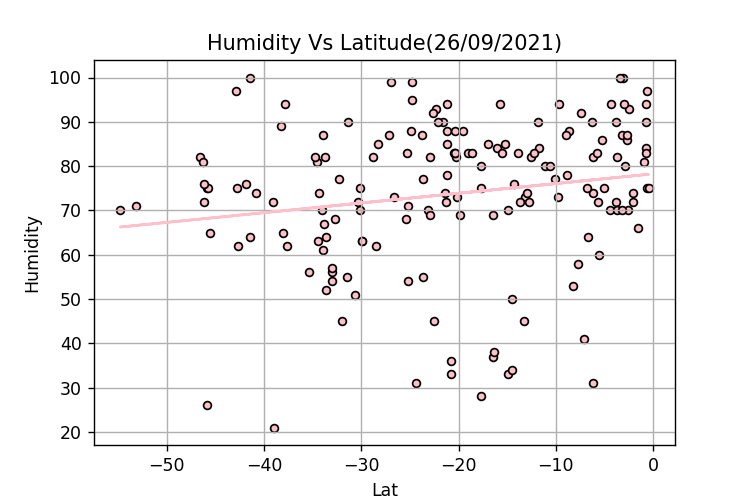

Text(0.5, 1.0, 'Humidity Vs Latitude(26/09/2021)')

In [27]:
#define x-axis for further calculations
x_axis =southern_hemi_df['Lat']
#correlation coeffecient
corr, _ = stats.pearsonr(x_axis,southern_hemi_df['Humidity'])
print(f"The value of r is {round(corr, 2)}")

#scatter plot 
southern_hemi_df.plot(kind = 'scatter',x = 'Lat', y ='Humidity',figsize=(6,4),color ="Pink",edgecolor="black",grid = True)
plt.title("Humidity Vs Latitude(26/09/2021)")

In [28]:
#linear regression Humidity vs Latitude - Southern Hemisphere
humid_slope,humid_int,humid_r,humid_p,humid_std_err = stats.linregress (x_axis,southern_hemi_df['Humidity'])
humid_fit = humid_slope*x_axis + humid_int
#plot the linear regression
plt.plot(x_axis,humid_fit,color='Pink')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The value of r is 0.14


<IPython.core.display.Javascript object>


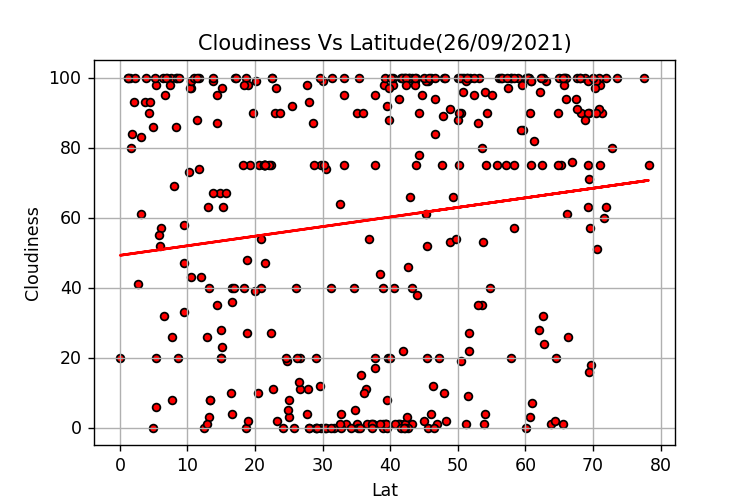

Text(0.5, 1.0, 'Cloudiness Vs Latitude(26/09/2021)')

In [29]:
#define x-axis for further calculations
x_axis =northern_hemi_df['Lat']
#correlation coeffecient
corr, _ = stats.pearsonr(x_axis,northern_hemi_df['Cloudiness'])
print(f"The value of r is {round(corr, 2)}")

#scatter plot 
northern_hemi_df.plot(kind = 'scatter',x = 'Lat', y ='Cloudiness',figsize=(6,4),color ="Red",edgecolor="black",grid = True)
plt.title("Cloudiness Vs Latitude(26/09/2021)")

In [30]:
#linear regression Cloudiness vs Latitude - Northern Hemisphere
humid_slope,humid_int,humid_r,humid_p,humid_std_err = stats.linregress (x_axis,northern_hemi_df['Cloudiness'])
humid_fit = humid_slope*x_axis + humid_int
#plot the linear regression
plt.plot(x_axis,humid_fit,color='Red')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The value of r is 0.05


<IPython.core.display.Javascript object>


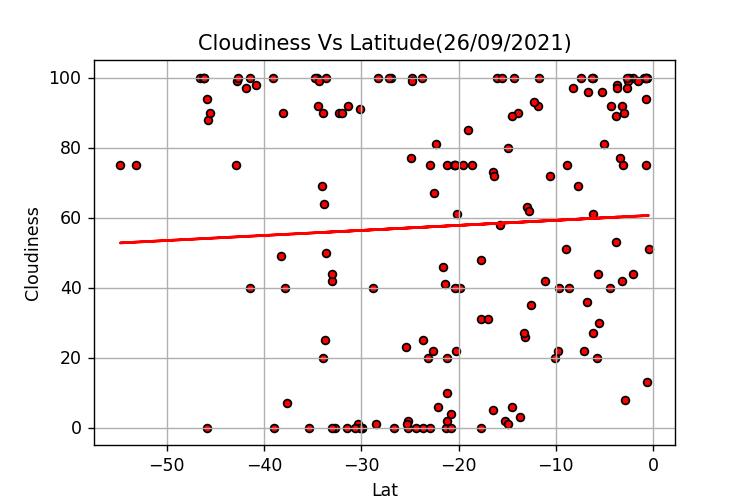

Text(0.5, 1.0, 'Cloudiness Vs Latitude(26/09/2021)')

In [31]:
#define x-axis for further calculations
x_axis =southern_hemi_df['Lat']
#correlation coeffecient
corr, _ = stats.pearsonr(x_axis,southern_hemi_df['Cloudiness'])
print(f"The value of r is {round(corr, 2)}")

#scatter plot 
southern_hemi_df.plot(kind = 'scatter',x = 'Lat', y ='Cloudiness',figsize=(6,4),color ="Red",edgecolor="black",grid = True)
plt.title("Cloudiness Vs Latitude(26/09/2021)")

In [32]:
#linear regression Cloudiness vs Latitude - Southern Hemisphere
humid_slope,humid_int,humid_r,humid_p,humid_std_err = stats.linregress (x_axis,southern_hemi_df['Cloudiness'])
humid_fit = humid_slope*x_axis + humid_int
#plot the linear regression
plt.plot(x_axis,humid_fit,color='Red')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The value of r is 0.14


<IPython.core.display.Javascript object>


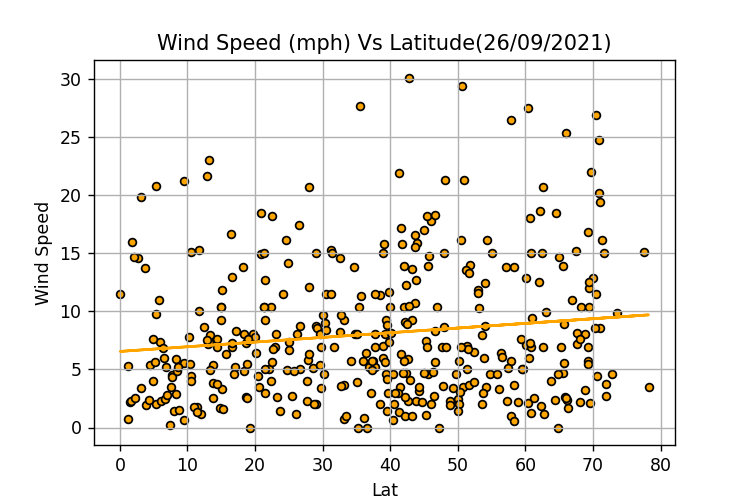

Text(0.5, 1.0, 'Wind Speed (mph) Vs Latitude(26/09/2021)')

In [33]:
#define x-axis for further calculations
x_axis =northern_hemi_df['Lat']
#correlation coeffecient
corr, _ = stats.pearsonr(x_axis,northern_hemi_df['Wind Speed'])
print(f"The value of r is {round(corr, 2)}")

#scatter plot 
northern_hemi_df.plot(kind = 'scatter',x = 'Lat', y ='Wind Speed',figsize=(6,4),color ="Orange",edgecolor="black",grid = True)
plt.title("Wind Speed (mph) Vs Latitude(26/09/2021)")

In [34]:
#linear regression Wind Speed vs Latitude - Northern Hemisphere
humid_slope,humid_int,humid_r,humid_p,humid_std_err = stats.linregress (x_axis,northern_hemi_df['Wind Speed'])
humid_fit = humid_slope*x_axis + humid_int
#plot the linear regression
plt.plot(x_axis,humid_fit,color='Orange')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The value of r is -0.29


<IPython.core.display.Javascript object>


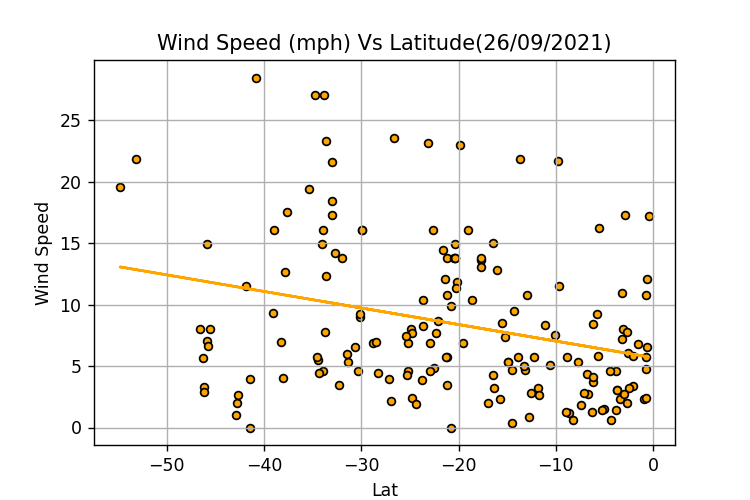

Text(0.5, 1.0, 'Wind Speed (mph) Vs Latitude(26/09/2021)')

In [36]:
#define x-axis for further calculations
x_axis =southern_hemi_df['Lat']
#correlation coeffecient
corr, _ = stats.pearsonr(x_axis,southern_hemi_df['Wind Speed'])
print(f"The value of r is {round(corr, 2)}")

#scatter plot 
southern_hemi_df.plot(kind = 'scatter',x = 'Lat', y ='Wind Speed',figsize=(6,4),color ="Orange",edgecolor="black",grid = True)
plt.title("Wind Speed (mph) Vs Latitude(26/09/2021)")

In [37]:
#linear regression Wind Speed vs Latitude - Southern Hemisphere
humid_slope,humid_int,humid_r,humid_p,humid_std_err = stats.linregress (x_axis,southern_hemi_df['Wind Speed'])
humid_fit = humid_slope*x_axis + humid_int
#plot the linear regression
plt.plot(x_axis,humid_fit,color='Orange')